<h1>Kapitel 13 Mer om Regressionsanalys</h1>

In [18]:
#importera paket och exempeldata 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs 
from scipy.stats import t
from scipy.stats import norm
from statsmodels.stats import proportion
import statsmodels.api as sm
from statsmodels.formula.api import ols

Debt_Payments = None
with pd.ExcelFile(r"\\home.gu.gu.se\home-XS$\xsumat\Documents\ITHS\Data\Kap12.xlsx") as reader:
        Debt_Payments=pd.read_excel(reader, sheet_name='Debt_Payments')

In [19]:
Debt_Payments.head()

,Metropolitan area,Debt,Income,Unemployment
0,"Washington, D.C.",1285,103.5,6.3
1,Seattle,1135,81.7,8.5
2,Baltimore,1133,82.2,8.1
3,Boston,1133,89.5,7.6
4,Denver,1104,75.9,8.1


<h3>Korrelationstest med scipy.stats</h3>

In [20]:
r,p=scs.pearsonr(Debt_Payments['Income'],Debt_Payments['Debt'])
p

9.66033097818347e-09

<h3>Konfidensintervall och hypotestest för koefficienterna i regressionsmodellen</h3>

In [37]:
model = ols('Debt ~ Income', data=Debt_Payments).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Debt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     73.00
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           9.66e-09
Time:                        15:16:58   Log-Likelihood:                -143.68
No. Observations:                  26   AIC:                             291.4
Df Residuals:                      24   BIC:                             293.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.2977     91.339      2.302      0.0

<h3>Prediktionsintervall in sample-prediktion</h3>

In [28]:
predictions = model.get_prediction(Debt_Payments['Income'])
frame=predictions.summary_frame(alpha=0.05)
frame[['obs_ci_lower','obs_ci_upper']]

,obs_ci_lower,obs_ci_upper
0,1138.572126,1443.332059
1,928.893732,1197.778258
2,933.927514,1203.185581
3,1006.137120,1283.416114
4,869.645274,1135.909893
5,1043.777937,1327.215919
6,865.500372,1131.701911
7,840.470398,1106.614578
8,788.514940,1056.247204
9,861.347829,1127.501570


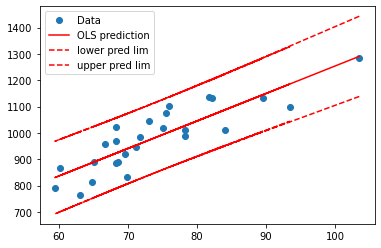

In [33]:
fig, ax = plt.subplots()
ax.plot(Debt_Payments['Income'],Debt_Payments['Debt'], "o", label="Data")
ax.plot(Debt_Payments['Income'], ypred, "r", label="OLS prediction")
ax.plot(Debt_Payments['Income'], frame['obs_ci_lower'], "r--", label="lower pred lim")
ax.plot(Debt_Payments['Income'], frame['obs_ci_upper'], "r--", label="upper pred lim")
ax.legend(loc="best")
plt.show()

<h3>Prediktionsintervall out of sample-prediktion</h3>

In [54]:

Income_new=pd.DataFrame([92,103,202], columns=['Income'])
predictions = model.get_prediction(Income_new)
frame=predictions.summary_frame(alpha=0.05)
frame[['obs_ci_lower','obs_ci_upper']]

,obs_ci_lower,obs_ci_upper
0,1030.337277,1311.421483
1,1133.962298,1437.500782
2,1970.337401,2668.464549


<h3>Multipelregression</h3>

In [55]:
model = ols('Debt ~ Income+Unemployment', data=Debt_Payments).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Debt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     35.00
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           1.05e-07
Time:                        15:47:05   Log-Likelihood:                -143.68
No. Observations:                  26   AIC:                             293.4
Df Residuals:                      23   BIC:                             297.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      198.9956    156.362      1.273   